# 人民币影子利率 VS 美元指数
人民币影子利率 = M2 / 外汇储备

In [1]:
import os
import pandas as pd

# 获取当前工作目录
cwd = os.getcwd()

# 判断是否存在figure文件夹，如果不存在就创建该文件夹
if not os.path.exists('figure'):
    os.makedirs('figure')

# 指定要读取数据的目录
data_dir = os.path.join(cwd, 'data_xlsx')

data_file = '美元指数.xlsx'
data_path = os.path.join(data_dir, data_file)
USDX_table = pd.read_excel(data_path).dropna()
USDX_table.columns = ["Date", "USDX"]
USDX_table['Date'] = pd.to_datetime(USDX_table['Date'])
# USDX_table

data_file = '中国_M2.xlsx'
data_path = os.path.join(data_dir, data_file)
M2_table = pd.read_excel(data_path).dropna()
M2_table.columns = ["Date", "China M2"]
M2_table['Date'] = pd.to_datetime(M2_table['Date'])
# M2_table

data_file = '中国_官方储备资产_外汇储备.xlsx'
data_path = os.path.join(data_dir, data_file)
FXReserve_table = pd.read_excel(data_path).dropna()
FXReserve_table.columns = ["Date", "FX Reserve"]
FXReserve_table['Date'] = pd.to_datetime(FXReserve_table['Date'])
# FXReserve_table

data_file = '中国_金融机构_外汇各项存款余额.xlsx'
data_path = os.path.join(data_dir, data_file)
Deposits_table = pd.read_excel(data_path).dropna()
Deposits_table.columns = ["Date", "Deposits"]
Deposits_table['Date'] = pd.to_datetime(Deposits_table['Date'])
# Deposits_table

USDX_table1 = USDX_table.set_index('Date', inplace=False)
USDX_table_monthly = USDX_table1.resample('M').last()

# 指定输出目录
output_dir = os.path.join(cwd, 'data_csv')
# 指定输出文件名
output_file = '美元指数（月）.csv'
output_path = os.path.join(output_dir, output_file)
USDX_table_monthly.to_csv(output_path)

USDX_table_monthly = pd.read_csv("data_csv/美元指数（月）.csv")
USDX_table_monthly['Date'] = pd.to_datetime(USDX_table_monthly['Date'])
# USDX_table_monthly

merged_table1 = pd.merge(M2_table, FXReserve_table, on = "Date", how = "inner")
merged_table1['Shadow CNY'] = merged_table1['China M2'] / merged_table1['FX Reserve']

merged_table2 = pd.merge(merged_table1, USDX_table_monthly, on = "Date", how = "outer")
merged_table2.sort_values(by='Date', inplace=True)
merged_table2

c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Date,China M2,FX Reserve,Shadow CNY,USDX
0,2000-01-31,121220.40,1561.00,77.655605,105.0400
1,2000-02-29,121583.40,1565.59,77.659796,106.0600
2,2000-03-31,122606.82,1568.20,78.183153,105.4700
3,2000-04-30,124121.87,1568.46,79.136140,109.9300
4,2000-05-31,124053.25,1580.19,78.505275,108.6000
...,...,...,...,...,...
278,2023-03-31,2814566.31,31838.72,88.400737,102.5970
279,2023-04-30,2808469.34,32047.66,87.634147,101.6645
280,2023-05-31,2820504.68,31765.08,88.792620,104.2208
281,2023-06-30,NaN,NaN,NaN,103.3788


In [2]:
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Line,Bar
from pyecharts import options as opts

line = Line() #创建Line实例

# 设置折线1
line.add_xaxis(merged_table2['Date'].tolist())
line.add_yaxis('美元指数', merged_table2['USDX'].tolist(), label_opts=opts.LabelOpts(is_show=False), color='#FFB6C1')

# 设置折线2，并将yaxis_index设置为1，表示使用右侧y轴
line.add_yaxis('人民币影子利率', merged_table2['Shadow CNY'].tolist(), yaxis_index=1, label_opts=opts.LabelOpts(is_show=False), color='#6495ED')

# 设置y轴1最大值、最小值和间隔
line.set_global_opts(
    yaxis_opts=opts.AxisOpts(
        axislabel_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(value){return value.toFixed(0)}"
            )
        ),
        splitline_opts=opts.SplitLineOpts(is_show=True),
        min_=USDX_table_monthly['USDX'].mean() - 2.6*USDX_table_monthly['USDX'].std(),  # 左侧y轴最小值
        max_=USDX_table_monthly['USDX'].mean() + 2.6*USDX_table_monthly['USDX'].std(),  # 左侧y轴最大值
        interval=10  # 左侧y轴间隔
    ),
    datazoom_opts=[
        opts.DataZoomOpts(
            is_show=True, type_="inside", xaxis_index=[0, 0],#filter_mode = 'weakFilter',
            ),
            opts.DataZoomOpts(
                is_show=True, type_="slider",xaxis_index=[0, 0], pos_top="93%",#filter_mode = 'weakFilter',
                ),
                ],
    tooltip_opts=opts.TooltipOpts(
        trigger="axis",
        axis_pointer_type="cross",
        background_color="rgba(245, 245, 245, 0.8)",
        border_width=1,
        border_color="#ccc",
        textstyle_opts=opts.TextStyleOpts(color="#000"),
        ),
    axispointer_opts=opts.AxisPointerOpts(
        is_show=True, link=[{"xAxisIndex": [0]},{"yAxisIndex": [0]},]
        ),
)

# 设置右侧y轴，并按需添加is_inverse=True参数
line.extend_axis(
    yaxis=opts.AxisOpts(
        axislabel_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(value){return value.toFixed(0)}"
            )
        ),
        name='人民币影子利率',
        min_=merged_table1['Shadow CNY'].mean() - 2.6*merged_table1['Shadow CNY'].std(),
        max_=merged_table1['Shadow CNY'].mean() + 2.6*merged_table1['Shadow CNY'].std(),
        interval=10,
        position='right',
        # is_inverse=True
    )
)

# 隐藏数据系列标签，使图表更加简洁
line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))

line.render('figure/Shadow CNY-USDX.html')

'c:\\Users\\siruo\\Downloads\\洪灏人民币指标\\figure\\Shadow CNY-USDX.html'

# 外汇储备和存款 VS 人民币升贬值

In [3]:
merged_table3 = pd.merge(FXReserve_table, Deposits_table, on = "Date", how = "inner")
merged_table3['Sum'] = merged_table3['FX Reserve'] + merged_table3['Deposits']

USDCNY_table = pd.read_excel("data_xlsx/即期汇率_美元兑人民币.xlsx").dropna()
USDCNY_table.columns = ["Date", "USDCNY"]
USDCNY_table['Date'] = pd.to_datetime(USDCNY_table['Date'])
USDCNY_table1 = USDCNY_table.set_index('Date', inplace=False)
USDCNY_table_monthly = USDCNY_table1.resample('M').last()

output_file = '即期汇率_美元兑人民币（月）.csv'
output_path = os.path.join(output_dir, output_file)
USDCNY_table_monthly.to_csv(output_path)

USDCNY_table_monthly = pd.read_csv("data_csv/即期汇率_美元兑人民币（月）.csv")
USDCNY_table_monthly['Date'] = pd.to_datetime(USDCNY_table_monthly['Date'])
# USDCNY_table_monthly

merged_table4 = pd.merge(merged_table3, USDCNY_table_monthly, on = "Date", how = "outer")
merged_table4.sort_values(by='Date', inplace=True)
merged_table4

c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Date,FX Reserve,Deposits,Sum,USDCNY
222,2000-01-31,NaN,NaN,NaN,8.2777
223,2000-02-29,NaN,NaN,NaN,8.2786
224,2000-03-31,NaN,NaN,NaN,8.2787
225,2000-04-30,NaN,NaN,NaN,8.2799
226,2000-05-31,NaN,NaN,NaN,8.2773
...,...,...,...,...,...
219,2023-03-31,31838.72,9115.0,40953.72,6.8713
220,2023-04-30,32047.66,8819.0,40866.66,6.9284
221,2023-05-31,31765.08,8518.0,40283.08,7.1065
281,2023-06-30,NaN,NaN,NaN,7.2620


In [4]:
line = Line() #创建Line实例

# 设置折线1
line.add_xaxis(merged_table4['Date'].tolist())
line.add_yaxis('外汇储备和存款', merged_table4['Sum'].tolist(), label_opts=opts.LabelOpts(is_show=False), color='#6495ED')

# 设置折线2，并将yaxis_index设置为1，表示使用右侧y轴
line.add_yaxis('汇率', merged_table4['USDCNY'].tolist(), yaxis_index=1, label_opts=opts.LabelOpts(is_show=False), color='#FFB6C1')

# 设置y轴1最大值、最小值和间隔
line.set_global_opts(
    yaxis_opts=opts.AxisOpts(
        axislabel_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(value){return value.toFixed(0)}"
            )
        ),
        splitline_opts=opts.SplitLineOpts(is_show=True),
        min_=merged_table3['Sum'].mean() - 2.4*merged_table3['Sum'].std(),
        max_=merged_table3['Sum'].mean() + 2.4*merged_table3['Sum'].std(),
        # interval=0.2  # 左侧y轴间隔
    ),
    datazoom_opts=[
        opts.DataZoomOpts(
            is_show=True, type_="inside", xaxis_index=[0, 0],#filter_mode = 'weakFilter',
            ),
            opts.DataZoomOpts(
                is_show=True, type_="slider",xaxis_index=[0, 0], pos_top="93%",#filter_mode = 'weakFilter',
                ),
                ],
    tooltip_opts=opts.TooltipOpts(
        trigger="axis",
        axis_pointer_type="cross",
        background_color="rgba(245, 245, 245, 0.8)",
        border_width=1,
        border_color="#ccc",
        textstyle_opts=opts.TextStyleOpts(color="#000"),
        ),
    axispointer_opts=opts.AxisPointerOpts(
        is_show=True, link=[{"xAxisIndex": [0]},{"yAxisIndex": [0]},]
        ),
)

# 设置右侧y轴，并添加is_inverse=True参数
line.extend_axis(
    yaxis=opts.AxisOpts(
        axislabel_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(value){return value.toFixed(2)}"
            )
        ),
        name='汇率',
        min_=USDCNY_table_monthly['USDCNY'].mean() - 2.4*USDCNY_table_monthly['USDCNY'].std(),  # 右侧y轴最小值
        max_=USDCNY_table_monthly['USDCNY'].mean() + 2.4*USDCNY_table_monthly['USDCNY'].std(),  # 右侧y轴最大值
        interval=0.2,  # 右侧y轴间隔
        position='right',
        is_inverse=True
    )
)

# 隐藏数据系列标签，使图表更加简洁
line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))

line.render('figure/FX Reserve+Deposits-USDCNY.html')

'c:\\Users\\siruo\\Downloads\\洪灏人民币指标\\figure\\FX Reserve+Deposits-USDCNY.html'

# 人民币的3.5年周期线

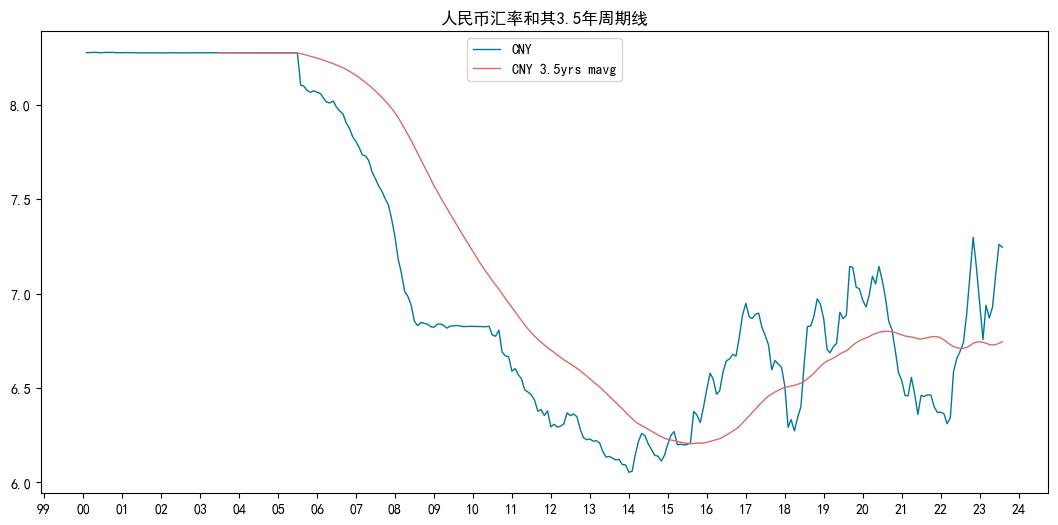

In [5]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

USDCNY_table_monthly['3.5yrs MA'] = USDCNY_table_monthly['USDCNY'].rolling(window=42).mean()

# 绘制折线图
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(USDCNY_table_monthly['Date'], USDCNY_table_monthly['USDCNY'], label='CNY', color='#007896FF', linewidth=1)
ax.plot(USDCNY_table_monthly['Date'], USDCNY_table_monthly['3.5yrs MA'], label='CNY 3.5yrs mavg', color='#db6968', linewidth=1)

# 设置x轴刻度
ax.xaxis.set_major_locator(YearLocator(1))
ax.xaxis.set_major_formatter(DateFormatter('%y'))

# 设置图例和坐标轴标签
ax.legend(loc='upper center')
ax.set_xlabel('')
ax.set_ylabel('')

# 设置标题
ax.set_title('人民币汇率和其3.5年周期线')

# 保存图片
plt.savefig("figure/CNY-3.5yrs mavg.png")

# 显示图形
plt.show()

# 人民币汇率 VS 金铜比

In [6]:
USDCNY_table2 = USDCNY_table[USDCNY_table['Date'].dt.year >= 2010]

Gold_table = pd.read_excel('data_xlsx/伦敦现货黄金_以美元计价.xlsx').dropna()
Gold_table.columns = ['Date', 'Gold']
Gold_table['Date'] = pd.to_datetime(Gold_table['Date'])

Copper_table = pd.read_excel('data_xlsx/现货结算价_LME铜.xlsx').dropna()
Copper_table.columns = ['Date', 'Copper']
Copper_table['Date'] = pd.to_datetime(Copper_table['Date'])

merged_table5 = pd.merge(Gold_table, Copper_table, on = "Date", how = "inner")
merged_table5["Gold-Copper"] = merged_table5["Gold"] / merged_table5["Copper"]

merged_table6 = pd.merge(USDCNY_table2, merged_table5, on = "Date", how = "outer")
merged_table6.sort_values(by='Date', inplace=True)
merged_table6

c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Date,USDCNY,Gold,Copper,Gold-Copper
0,2010-01-04,6.8269,1121.50,7464.0,0.150255
1,2010-01-05,6.8272,1123.25,7436.0,0.151056
2,2010-01-06,6.8275,1130.00,7587.5,0.148929
3,2010-01-07,6.8277,1130.25,7594.0,0.148835
4,2010-01-08,6.8274,1126.75,7446.0,0.151323
...,...,...,...,...,...
3274,2023-06-30,7.2620,1912.25,8210.0,0.232917
3275,2023-07-03,7.2466,1928.75,8355.0,0.230850
3276,2023-07-04,7.2161,1927.75,8349.0,0.230896
3277,2023-07-05,7.2444,1924.65,8251.0,0.233263


In [7]:
line = Line() #创建Line实例

# 设置折线1
line.add_xaxis(merged_table6['Date'].tolist())
line.add_yaxis('汇率', merged_table6['USDCNY'].tolist(), label_opts=opts.LabelOpts(is_show=False), color='#6495ED')

# 设置折线2，并将yaxis_index设置为1，表示使用右侧y轴
line.add_yaxis('金铜比', merged_table6['Gold-Copper'].tolist(), yaxis_index=1, label_opts=opts.LabelOpts(is_show=False), color='#FFB6C1')

# 设置y轴1最大值、最小值和间隔
line.set_global_opts(
    yaxis_opts=opts.AxisOpts(
        axislabel_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(value){return value.toFixed(2)}"
            )
        ),
        splitline_opts=opts.SplitLineOpts(is_show=True),
        min_=USDCNY_table2['USDCNY'].mean() - 3.7*USDCNY_table2['USDCNY'].std(),
        max_=USDCNY_table2['USDCNY'].mean() + 3.7*USDCNY_table2['USDCNY'].std(),
        interval=0.2,
    ),
    datazoom_opts=[
        opts.DataZoomOpts(
            is_show=True, type_="inside", xaxis_index=[0, 0],#filter_mode = 'weakFilter',
            ),
            opts.DataZoomOpts(
                is_show=True, type_="slider",xaxis_index=[0, 0], pos_top="93%",#filter_mode = 'weakFilter',
                ),
                ],
    tooltip_opts=opts.TooltipOpts(
        trigger="axis",
        axis_pointer_type="cross",
        background_color="rgba(245, 245, 245, 0.8)",
        border_width=1,
        border_color="#ccc",
        textstyle_opts=opts.TextStyleOpts(color="#000"),
        ),
    axispointer_opts=opts.AxisPointerOpts(
        is_show=True, link=[{"xAxisIndex": [0]},{"yAxisIndex": [0]},]
        ),
)

# 设置右侧y轴，并添加is_inverse=True参数
line.extend_axis(
    yaxis=opts.AxisOpts(
        axislabel_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(value){return value.toFixed(2)}"
            )
        ),
        name='金铜比',
        min_=merged_table5['Gold-Copper'].mean() - 3.7*merged_table5['Gold-Copper'].std(),
        max_=merged_table5['Gold-Copper'].mean() + 3.7*merged_table5['Gold-Copper'].std(),
        interval=0.2,  # 右侧y轴间隔
        position='right',
        #is_inverse=True
    )
)

# 隐藏数据系列标签，使图表更加简洁
line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))

line.render('figure/Gold Copper Rate-USDCNY.html')

'c:\\Users\\siruo\\Downloads\\洪灏人民币指标\\figure\\Gold Copper Rate-USDCNY.html'

# 上证综合指数 VS 银行人民币存款变化

In [8]:
SHCOMP_table = pd.read_excel("data_xlsx/上证综合指数.xlsx").dropna()
SHCOMP_table.columns = ['Date', 'SHCOMP']
SHCOMP_table['Date'] = pd.to_datetime(SHCOMP_table['Date'])

SHCOMP_table1 = SHCOMP_table.set_index('Date', inplace=False)
SHCOMP_table_monthly = SHCOMP_table1.resample('M').last()

output_file = '上证综合指数（月）.csv'
output_path = os.path.join(output_dir, output_file)
SHCOMP_table_monthly.to_csv(output_path)

SHCOMP_table_monthly = pd.read_csv("data_csv/上证综合指数（月）.csv")
SHCOMP_table_monthly['Date'] = pd.to_datetime(SHCOMP_table_monthly['Date'])

Deposits_change_table = pd.read_excel("data_xlsx/中国_金融机构_新增人民币存款_当月值.xlsx").dropna()
Deposits_change_table.columns = ['Date', 'Deposits change']
Deposits_change_table['Date'] = pd.to_datetime(Deposits_change_table['Date'])

merged_table7 = pd.merge(SHCOMP_table_monthly, Deposits_change_table, on = "Date", how = "outer")
merged_table7.sort_values(by='Date', inplace=True)
merged_table7

c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Date,SHCOMP,Deposits change
0,2000-01-31,1534.9970,NaN
1,2000-02-29,1714.5780,NaN
2,2000-03-31,1800.2250,NaN
3,2000-04-30,1836.3210,NaN
4,2000-05-31,1894.5540,NaN
...,...,...,...
278,2023-03-31,3272.8602,57100.0
279,2023-04-30,3323.2746,-4609.0
280,2023-05-31,3204.5644,14600.0
281,2023-06-30,3202.0623,NaN


In [9]:
line = Line() #创建Line实例

# 设置折线1
line.add_xaxis(merged_table7['Date'].tolist())
line.add_yaxis('上证', merged_table7['SHCOMP'].tolist(), label_opts=opts.LabelOpts(is_show=False), color='#6495ED')

# 设置折线2，并将yaxis_index设置为1，表示使用右侧y轴
line.add_yaxis('人民币存款变化', merged_table7['Deposits change'].tolist(), yaxis_index=1, label_opts=opts.LabelOpts(is_show=False), color='#FFB6C1')

# 设置y轴1最大值、最小值和间隔
line.set_global_opts(
    yaxis_opts=opts.AxisOpts(
        axislabel_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(value){return value.toFixed(2)}"
            )
        ),
        splitline_opts=opts.SplitLineOpts(is_show=True),
        min_=SHCOMP_table_monthly['SHCOMP'].mean() - 4.9*SHCOMP_table_monthly['SHCOMP'].std(),
        max_=SHCOMP_table_monthly['SHCOMP'].mean() + 4.9*SHCOMP_table_monthly['SHCOMP'].std(),
        # interval=0.2,
    ),
    datazoom_opts=[
        opts.DataZoomOpts(
            is_show=True, type_="inside", xaxis_index=[0, 0],#filter_mode = 'weakFilter',
            ),
            opts.DataZoomOpts(
                is_show=True, type_="slider",xaxis_index=[0, 0], pos_top="93%",#filter_mode = 'weakFilter',
                ),
                ],
    tooltip_opts=opts.TooltipOpts(
        trigger="axis",
        axis_pointer_type="cross",
        background_color="rgba(245, 245, 245, 0.8)",
        border_width=1,
        border_color="#ccc",
        textstyle_opts=opts.TextStyleOpts(color="#000"),
        ),
    axispointer_opts=opts.AxisPointerOpts(
        is_show=True, link=[{"xAxisIndex": [0]},{"yAxisIndex": [0]},]
        ),
)

# 设置右侧y轴，并添加is_inverse=True参数
line.extend_axis(
    yaxis=opts.AxisOpts(
        axislabel_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(value){return value.toFixed(0)}"
            )
        ),
        name='人民币存款变化',
        min_=Deposits_change_table['Deposits change'].mean() - 4.9*Deposits_change_table['Deposits change'].std(),
        max_=Deposits_change_table['Deposits change'].mean() + 4.9*Deposits_change_table['Deposits change'].std(),
        #interval=0.2,  # 右侧y轴间隔
        position='right',
        #is_inverse=True
    )
)

# 隐藏数据系列标签，使图表更加简洁
line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))

line.render('figure/SHCOMP-Deposits change.html')

'c:\\Users\\siruo\\Downloads\\洪灏人民币指标\\figure\\SHCOMP-Deposits change.html'

# 沪深300指数 VS 市场风险指标EYBY

股票盈利收益（Equity yield,EY）——即市盈率的倒数，E/P，此处选择的是滚动市盈率PE（TTM）。

债券收益（Bond yield,BY）——即选取十年期国债收益率。

相对吸引力指标 = EY / BY，代表股票收益率相对于债券收益率的倍数，格雷厄姆曾经提及，其希望获取的股票收益应至少是债券收益的两倍，因此当此比值大于2时，股票资产可以认为是有吸引力的。

参考链接：
1. [从债市的角度观察股市——EYBY股债收益比较模型](https://www.jiemian.com/article/2116121.html)
2. [洪灝：与牛共舞](http://finance.sina.cn/zl/2020-07-13/zl-iivhvpwx5020310.d.html?from=wap)

In [10]:
CSI300_table = pd.read_excel('data_xlsx/沪深300指数.xlsx').dropna()
CSI300_table.columns = ['Date', 'CSI300']
CSI300_table['Date'] = pd.to_datetime(CSI300_table['Date'])

CSI300_PE_TTM_table = pd.read_excel('data_xlsx/滚动市盈率(TTM)_沪深300.xlsx').dropna()
CSI300_PE_TTM_table.columns = ['Date', 'PE_TTM']
CSI300_PE_TTM_table['Date'] = pd.to_datetime(CSI300_PE_TTM_table['Date'])
CSI300_PE_TTM_table['EY'] = 1 / CSI300_PE_TTM_table['PE_TTM']
# CSI300_PE_TTM_table['EY'] = CSI300_PE_TTM_table['EY'] * 100

CN_Y10_table = pd.read_csv('data_csv/中国十年期国债收益率历史数据.csv')
CN_Y10_table = CN_Y10_table[['日期', '收盘']]
CN_Y10_table.columns = ['Date', 'CN_Y10']
CN_Y10_table['Date'] = pd.to_datetime(CN_Y10_table['Date'])
CN_Y10_table['CN_Y10'] = CN_Y10_table['CN_Y10'] / 100

merged_table8 = pd.merge(CSI300_PE_TTM_table, CN_Y10_table, on = 'Date', how = 'inner')
merged_table8['EYBY'] = merged_table8['EY'] / merged_table8['CN_Y10']
# merged_table8['EYBY'] = merged_table8['EY'] - merged_table8['CN_Y10']

merged_table9 = pd.merge(CSI300_table, merged_table8, on = 'Date', how = 'outer')
merged_table9.sort_values(by='Date', inplace=True)
merged_table9

c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Date,CSI300,PE_TTM,EY,CN_Y10,EYBY
0,2002-01-04,1316.4550,NaN,NaN,NaN,NaN
1,2002-01-07,1302.0840,NaN,NaN,NaN,NaN
2,2002-01-08,1292.7140,NaN,NaN,NaN,NaN
3,2002-01-09,1272.6450,NaN,NaN,NaN,NaN
4,2002-01-10,1281.2610,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5212,2023-06-30,3842.4516,11.6818,0.085603,0.02683,3.190579
5213,2023-07-03,3892.8821,11.8622,0.084301,0.02693,3.130390
5214,2023-07-04,3899.0133,11.8602,0.084316,0.02705,3.117028
5215,2023-07-05,3868.8054,11.7691,0.084968,0.02702,3.144643


In [11]:
line = Line() #创建Line实例

# 设置折线1
line.add_xaxis(merged_table9['Date'].tolist())
line.add_yaxis('沪深300', merged_table9['CSI300'].tolist(), label_opts=opts.LabelOpts(is_show=False), color='#6495ED')

# 设置折线2，并将yaxis_index设置为1，表示使用右侧y轴
line.add_yaxis('EYBY', merged_table9['EYBY'].tolist(), yaxis_index=1, label_opts=opts.LabelOpts(is_show=False), color='#FFB6C1')

# 设置y轴1最大值、最小值和间隔
line.set_global_opts(
    yaxis_opts=opts.AxisOpts(
        axislabel_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(value){return value.toFixed(0)}"
            )
        ),
        splitline_opts=opts.SplitLineOpts(is_show=True),
        min_=CSI300_table['CSI300'].mean() - 3*CSI300_table['CSI300'].std(),
        max_=CSI300_table['CSI300'].mean() + 3*CSI300_table['CSI300'].std(),
        # interval=0.2,
    ),
    datazoom_opts=[
        opts.DataZoomOpts(
            is_show=True, type_="inside", xaxis_index=[0, 0],#filter_mode = 'weakFilter',
            ),
            opts.DataZoomOpts(
                is_show=True, type_="slider",xaxis_index=[0, 0], pos_top="93%",#filter_mode = 'weakFilter',
                ),
                ],
    tooltip_opts=opts.TooltipOpts(
        trigger="axis",
        axis_pointer_type="cross",
        background_color="rgba(245, 245, 245, 0.8)",
        border_width=1,
        border_color="#ccc",
        textstyle_opts=opts.TextStyleOpts(color="#000"),
        ),
    axispointer_opts=opts.AxisPointerOpts(
        is_show=True, link=[{"xAxisIndex": [0]},{"yAxisIndex": [0]},]
        ),
)

# 设置右侧y轴，并添加is_inverse=True参数
line.extend_axis(
    yaxis=opts.AxisOpts(
        axislabel_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(value){return value.toFixed(2)}"
            )
        ),
        name='EYBY',
        min_=merged_table8['EYBY'].mean() - 3*merged_table8['EYBY'].std(),
        max_=merged_table8['EYBY'].mean() + 3*merged_table8['EYBY'].std(),
        #interval=0.2,  # 右侧y轴间隔
        position='right',
        #is_inverse=True
    )
)

# 隐藏数据系列标签，使图表更加简洁
line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))

line.render('figure/CSI300-EYBY change.html')

'c:\\Users\\siruo\\Downloads\\洪灏人民币指标\\figure\\CSI300-EYBY change.html'

# 人民币汇率 VS 人民币1年远期汇率 VS 股指

In [12]:
SZSE_A_table = pd.read_excel('data_xlsx/深交所_A股_总市值.xlsx').dropna()
SZSE_A_table.columns = ['Date', 'SZSE A']
SZSE_A_table['Date'] = pd.to_datetime(SZSE_A_table['Date'])

SSE_A_table = pd.read_excel('data_xlsx/上证所_A股_总市值.xlsx').dropna()
SSE_A_table.columns = ['Date', 'SSE A']
SSE_A_table['Date'] = pd.to_datetime(SSE_A_table['Date'])

All_A_table = pd.merge(SZSE_A_table,SSE_A_table, on = 'Date', how = 'inner')
All_A_table['All A'] = SZSE_A_table['SZSE A'] + SSE_A_table['SSE A']

USDCNY1YF_table = pd.read_excel('data_xlsx/美元兑人民币1年远期.xlsx').dropna()
USDCNY1YF_table = USDCNY1YF_table[['日期', '收盘价(元)']]
USDCNY1YF_table.columns = ['Date', 'USDCNY1YF']
USDCNY1YF_table['Date'] = pd.to_datetime(USDCNY1YF_table['Date'])

merged_table10 = pd.merge(USDCNY_table, USDCNY1YF_table, on = 'Date', how = 'outer')
merged_table10 = pd.merge(merged_table10, All_A_table, on = 'Date', how = 'outer')
merged_table10.sort_values(by='Date', inplace=True)
merged_table10

c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Date,USDCNY,USDCNY1YF,SZSE A,SSE A,All A
0,2000-01-03,8.2798,NaN,NaN,NaN,NaN
1,2000-01-04,8.2799,NaN,NaN,NaN,NaN
2,2000-01-05,8.2798,NaN,NaN,NaN,NaN
3,2000-01-06,8.2797,NaN,NaN,NaN,NaN
4,2000-01-07,8.2794,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5718,2023-07-03,7.2466,6.9800,340488.0,431437.0,771925.0
5719,2023-07-04,7.2161,6.9744,342005.0,431069.0,773074.0
5720,2023-07-05,7.2444,6.9785,339180.0,428467.0,767647.0
5721,2023-07-06,7.2465,6.9931,337923.0,426054.0,763977.0


In [13]:
line = Line() #创建Line实例

# 设置折线1
line.add_xaxis(merged_table10['Date'].tolist())
line.add_yaxis('沪深A股市值', merged_table10['All A'].tolist(), label_opts=opts.LabelOpts(is_show=False), color='#88c4e8')

# 设置折线2，并将yaxis_index设置为1，表示使用右侧y轴
line.add_yaxis('人民币真实汇率', merged_table10['USDCNY'].tolist(), yaxis_index=1, label_opts=opts.LabelOpts(is_show=False), color='#ea9c9d')

line.add_yaxis('人民币1年远期汇率', merged_table10['USDCNY1YF'].tolist(), yaxis_index=1, label_opts=opts.LabelOpts(is_show=False), color='#93cc82')

# 设置y轴1最大值、最小值和间隔
line.set_global_opts(
    yaxis_opts=opts.AxisOpts(
        axislabel_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(value){return value.toFixed(0)}"
            )
        ),
        splitline_opts=opts.SplitLineOpts(is_show=True),
        min_=All_A_table['All A'].mean() - 2.4*All_A_table['All A'].std(),
        max_=All_A_table['All A'].mean() + 2.4*All_A_table['All A'].std(),
        interval=100000  # 左侧y轴间隔
    ),
    datazoom_opts=[
        opts.DataZoomOpts(
            is_show=True, type_="inside", xaxis_index=[0, 0],#filter_mode = 'weakFilter',
            ),
            opts.DataZoomOpts(
                is_show=True, type_="slider",xaxis_index=[0, 0], pos_top="93%",#filter_mode = 'weakFilter',
                ),
                ],
    tooltip_opts=opts.TooltipOpts(
        trigger="axis",
        axis_pointer_type="cross",
        background_color="rgba(245, 245, 245, 0.8)",
        border_width=1,
        border_color="#ccc",
        textstyle_opts=opts.TextStyleOpts(color="#000"),
        ),
    axispointer_opts=opts.AxisPointerOpts(
        is_show=True, link=[{"xAxisIndex": [0]},{"yAxisIndex": [0]},]
        ),
)

# 设置右侧y轴，并添加is_inverse=True参数
line.extend_axis(
    yaxis=opts.AxisOpts(
        axislabel_opts=opts.LabelOpts(
            formatter=JsCode(
                "function(value){return value.toFixed(2)}"
            )
        ),
        name='汇率',
        min_=USDCNY_table['USDCNY'].mean() - 2.4*USDCNY_table['USDCNY'].std(),  # 右侧y轴最小值
        max_=USDCNY_table['USDCNY'].mean() + 2.4*USDCNY_table['USDCNY'].std(),  # 右侧y轴最大值
        interval=0.2,  # 右侧y轴间隔
        position='right',
        is_inverse=True
    )
)

# 隐藏数据系列标签，使图表更加简洁
line.set_series_opts(label_opts=opts.LabelOpts(is_show=False))

line.render('figure/All A-USDCNY-USDCNY1YF.html')

'c:\\Users\\siruo\\Downloads\\洪灏人民币指标\\figure\\All A-USDCNY-USDCNY1YF.html'

# 人民币汇率 VS 劳动生产率

c:\Users\siruo\miniconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


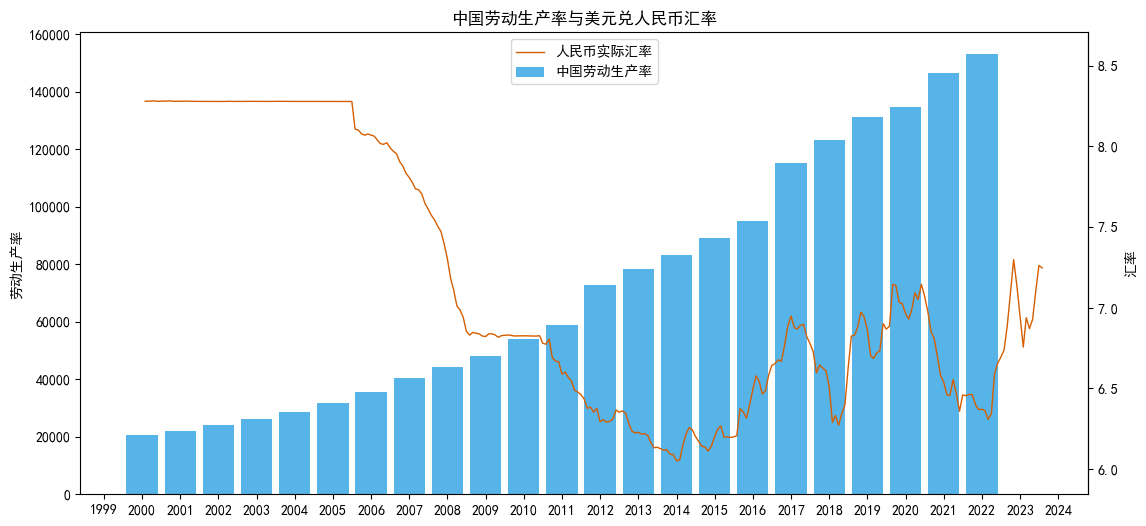

In [14]:
from sklearn.preprocessing import scale

labor_productivity_table = pd.read_excel('data_xlsx/中国_国家全员劳动生产率.xlsx').dropna()
labor_productivity_table.columns = ['Date', 'labor_productivity']
labor_productivity_table['Date'] = pd.to_datetime(labor_productivity_table['Date'])

USDCNY_table_monthly['USDCNY_z'] = scale(USDCNY_table_monthly['USDCNY'])

# 计算y2
y2 = USDCNY_table_monthly['USDCNY_z'] * labor_productivity_table['labor_productivity'].std() + labor_productivity_table['labor_productivity'].mean()

# 绘制折线图
fig, ax = plt.subplots(figsize=(13, 6))
ax.bar(labor_productivity_table['Date'] - pd.DateOffset(years=1), labor_productivity_table['labor_productivity'], label='中国劳动生产率', color='#56B4E9', width=300)
ax.plot(USDCNY_table_monthly['Date'], y2, label='人民币实际汇率', color='#D55E00', linewidth=1)

# 设置x轴刻度
ax.xaxis.set_major_locator(YearLocator(1))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
# plt.setp(ax.get_xticklabels(), rotation=60, ha='right')

# 设置y轴次坐标轴
def y2y2(y):
    return (y - labor_productivity_table['labor_productivity'].mean()) / labor_productivity_table['labor_productivity'].std() * USDCNY_table_monthly['USDCNY'].std() + USDCNY_table_monthly['USDCNY'].mean()
ax2 = ax.secondary_yaxis('right', functions=(y2y2, y2y2))

# 设置图例和坐标轴标签
ax.legend(loc='upper center')
ax.set_xlabel('')
ax.set_ylabel('劳动生产率')
ax2.set_ylabel('汇率')

# 设置标题
ax.set_title('中国劳动生产率与美元兑人民币汇率')

# 保存图片
plt.savefig("figure/USDCNY-labor productivity.png")

# 显示图形
plt.show()